In [8]:
# Show the column names 
print(df.columns)
df.describe()

Index(['_id', 'clusterID', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')


,clusterID,kWhDelivered,siteID,userID
count,11799.0,11799.000000,11799.0,468.000000
mean,39.0,8.951396,2.0,292.202991
std,0.0,6.602501,0.0,189.696680
min,39.0,0.501000,2.0,1.000000
25%,39.0,4.169500,2.0,159.000000
50%,39.0,7.561000,2.0,258.500000
75%,39.0,13.204000,2.0,513.000000
max,39.0,69.373000,2.0,781.000000


In [ ]:
#looking for outliers
df.isna().sum()

_id                     0
clusterID               0
connectionTime          0
disconnectTime          0
doneChargingTime        4
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              11331
userInputs          11331
dtype: int64

----- Kolomnamen in de dataset -----
['_id', 'clusterID', 'connectionTime', 'disconnectTime', 'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID', 'timezone', 'userID', 'userInputs', 'connectionHour'] 



In [ ]:
# Duration = disconnectTime - connectionTime (per sessionID)

In [21]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

# =============================================================================
# 1. LOAD THE DATA
# =============================================================================
df = pd.read_csv('acndata_sessions.csv')

# =============================================================================
# 2. DATA CLEANING AND FILTERING
# =============================================================================
df.dropna(subset=['sessionID', 'connectionTime', 'disconnectTime', 'doneChargingTime', 'kWhDelivered'], inplace=True)

# Convert to datetime
for col in ['connectionTime', 'disconnectTime', 'doneChargingTime']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop rows with failed datetime conversion
df.dropna(subset=['connectionTime', 'disconnectTime'], inplace=True)

# Calculate session duration in hours
df['session_duration'] = (df['disconnectTime'] - df['connectionTime']).dt.total_seconds() / 3600.0

# Filter out non-positive and extreme durations
df = df[(df['session_duration'] > 0) & (df['session_duration'] < 12)]

# =============================================================================
# 3. PLOTTING ARRIVAL RATE AND AVERAGE SESSION DURATION BY HOUR
# =============================================================================

# Normalize hour: shift such that 8:00 becomes 0
df['hour'] = (df['connectionTime'].dt.hour - 8) % 24

# Compute arrival rate and average session duration
arrival_rate = df.groupby('hour').size()
avg_duration = df.groupby('hour')['session_duration'].mean()

# Convert to DataFrame for Plotly
metrics_df = pd.DataFrame({
    'hour': arrival_rate.index,
    'arrival_rate': arrival_rate.values,
    'avg_duration': avg_duration.values
})

# Plot arrival rate
fig1 = px.line(metrics_df, x='hour', y='arrival_rate', markers=True,
               labels={'hour': 'Hour of Day', 'arrival_rate': 'Number of Sessions'},
               title='Session Arrival Rate by Hour')
fig1.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1))

# Plot average session duration
fig2 = px.line(metrics_df, x='hour', y='avg_duration', markers=True,
               labels={'hour': 'Hour of Day', 'avg_duration': 'Average Duration (hours)'},
               title='Average Session Duration by Hour')
fig2.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1))


# Show plots
fig1.show()
fig2.show()

# Optional: print metrics for verification
print("Arrival Rate by Hour:")
print(arrival_rate.sort_index())
print("\nAverage Session Duration by Hour (in hours):")
print(avg_duration.sort_index())

Arrival Rate by Hour:
hour
0       46
1       17
2       21
3      128
4       57
5      326
6      867
7     2062
8     1441
9      681
10     401
11     530
12     530
13     377
14     402
15     490
16     553
17     665
18     538
19     362
20     245
21     195
22      93
23      59
dtype: int64

Average Session Duration by Hour (in hours):
hour
0     4.112675
1     3.810082
2     3.359193
3     6.904954
4     3.524381
5     6.025608
6     7.284035
7     7.137486
8     6.580886
9     5.617128
10    4.296327
11    4.103747
12    3.649209
13    2.840964
14    2.404449
15    2.285677
16    2.339807
17    2.285556
18    2.880271
19    3.364014
20    3.724796
21    3.975192
22    4.283811
23    4.349379
Name: session_duration, dtype: float64


----- DataFrame shape (rows, columns) -----
(11799, 13) 

----- DataFrame info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11799 entries, 0 to 11798
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               11799 non-null  object 
 1   clusterID         11799 non-null  int64  
 2   connectionTime    11799 non-null  object 
 3   disconnectTime    11799 non-null  object 
 4   doneChargingTime  11795 non-null  object 
 5   kWhDelivered      11799 non-null  float64
 6   sessionID         11799 non-null  object 
 7   siteID            11799 non-null  int64  
 8   spaceID           11799 non-null  object 
 9   stationID         11799 non-null  object 
 10  timezone          11799 non-null  object 
 11  userID            468 non-null    float64
 12  userInputs        468 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB
None 

----- First 5 rows -----
       

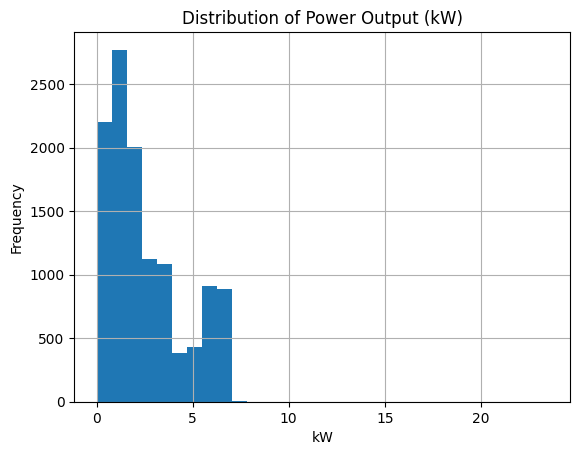

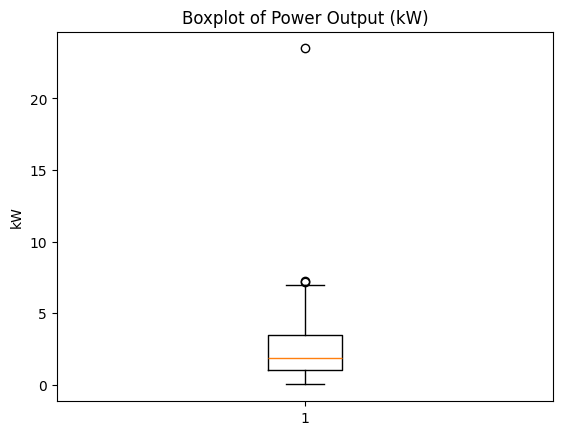

----- Average Power Output (kW) by Normalized Hour -----
connectionHourNormalized
0     2.485602
1     3.043391
2     2.309486
3     2.066620
4     4.040095
5     2.199343
6     1.746239
7     1.513050
8     1.695389
9     2.220836
10    2.578005
11    2.316029
12    2.521786
13    2.996306
14    3.774476
15    3.628064
16    3.695809
17    3.985987
18    3.849405
19    3.500357
20    3.241625
21    3.507611
22    2.974235
23    2.026522
Name: powerOutput_kW, dtype: float64 



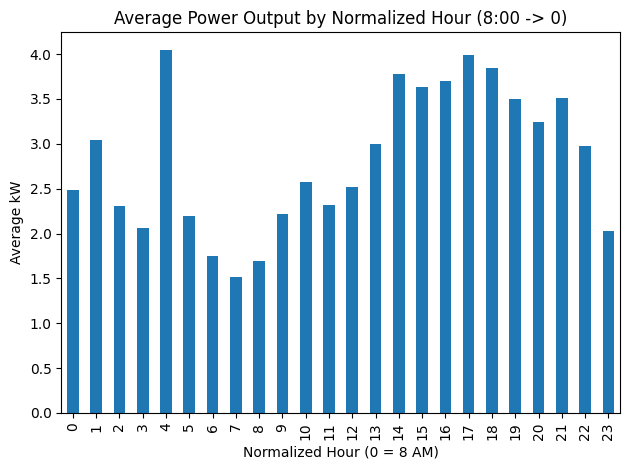

----- Correlation matrix of numeric columns -----
                          clusterID  kWhDelivered  siteID    userID  \
clusterID                       NaN           NaN     NaN       NaN   
kWhDelivered                    NaN      1.000000     NaN -0.070701   
siteID                          NaN           NaN     NaN       NaN   
userID                          NaN     -0.070701     NaN  1.000000   
chargingDuration                NaN      0.282408     NaN -0.030539   
powerOutput_kW                  NaN      0.154011     NaN -0.075279   
connectionHour                  NaN     -0.065331     NaN  0.031164   
connectionHourNormalized        NaN     -0.001497     NaN  0.024550   

                          chargingDuration  powerOutput_kW  connectionHour  \
clusterID                              NaN             NaN             NaN   
kWhDelivered                      0.282408        0.154011       -0.065331   
siteID                                 NaN             NaN             NaN  

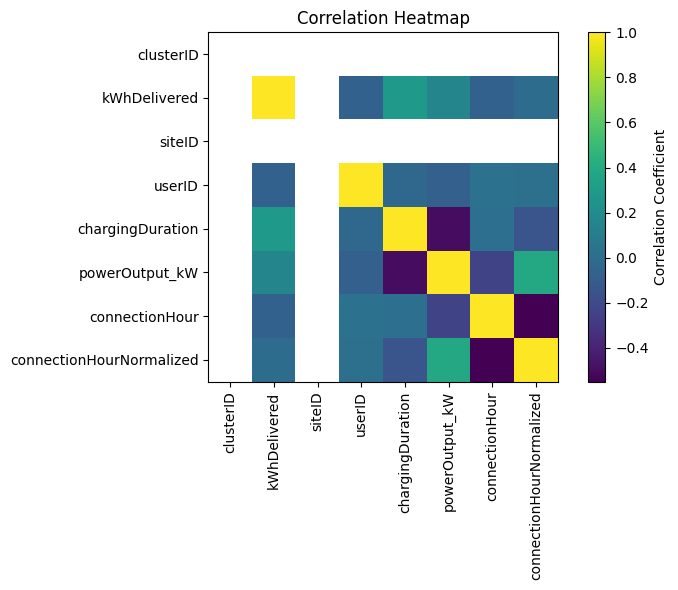


>>> Data cleaning and descriptive analysis complete <<<


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. File path
csv_file_path = "acndata_sessions.csv"

# 2. Read the CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# 3. Initial inspection
print("----- DataFrame shape (rows, columns) -----")
print(df.shape, "\n")

print("----- DataFrame info -----")
print(df.info(), "\n")

print("----- First 5 rows -----")
print(df.head(), "\n")

# 4. Check for missing values
print("----- Number of missing values per column -----")
print(df.isna().sum(), "\n")

# 5. Check for duplicated rows
duplicates = df.duplicated().sum()
print(f"----- Number of duplicated rows: {duplicates} -----\n")

# (Optional) Remove duplicated rows
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicated rows removed.")
    print(f"New DataFrame shape: {df.shape}\n")

# 6. Look at column names to understand the dataset
print("----- Column names in the dataset -----")
print(df.columns.tolist(), "\n")

# 7. Convert date/time columns (adjust if your columns differ)
date_cols = ["connectionTime", "disconnectTime", "doneChargingTime"]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")  # invalid entries -> NaT (Not a Time)

# 8. Convert expected numeric columns (e.g., 'kWhDelivered')
if "kWhDelivered" in df.columns:
    df["kWhDelivered"] = pd.to_numeric(df["kWhDelivered"], errors="coerce")

# 9. Check missing values again after conversions
print("----- Number of missing values after type conversions -----")
print(df.isna().sum(), "\n")

# 10. Decide how to handle missing values
# Example: drop rows where kWhDelivered or connectionTime are missing
before_drop = df.shape[0]
df.dropna(subset=["kWhDelivered", "connectionTime"], inplace=True)
after_drop = df.shape[0]
print(f"Number of rows dropped: {before_drop - after_drop}\n")

# 11. Create a charging duration column in hours (disconnectTime - connectionTime)
#    We'll drop or ignore rows where disconnectTime is missing or earlier than connectionTime
df["chargingDuration"] = (
    (df["disconnectTime"] - df["connectionTime"]).dt.total_seconds() / 3600
)

# Optionally drop rows where chargingDuration is <= 0 (invalid durations)
df = df.dropna(subset=["chargingDuration"])
df = df[df["chargingDuration"] > 0]

# 12. Calculate new power output (kW)
# kWh / hours = kW
df["powerOutput_kW"] = df["kWhDelivered"] / df["chargingDuration"]

# 13. Normalize the connection hour so that 8:00 -> hour 0
# We'll shift hours by subtracting 8, then take modulo 24
df["connectionHour"] = df["connectionTime"].dt.hour
df["connectionHourNormalized"] = (df["connectionHour"] - 8) % 24

# 14. Descriptive statistics for numeric columns
print("----- Statistical summary of numeric columns -----")
print(df.describe(), "\n")

# 15. Distribution plots: for example, powerOutput_kW
plt.figure()
df["powerOutput_kW"].hist(bins=30)
plt.title("Distribution of Power Output (kW)")
plt.xlabel("kW")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.boxplot(df["powerOutput_kW"].dropna())
plt.title("Boxplot of Power Output (kW)")
plt.ylabel("kW")
plt.show()

# 16. Simple time-based analysis using the normalized hour
mean_power_per_hour = df.groupby("connectionHourNormalized")["powerOutput_kW"].mean()
print("----- Average Power Output (kW) by Normalized Hour -----")
print(mean_power_per_hour, "\n")

# Visualization
plt.figure()
mean_power_per_hour.plot(kind="bar")
plt.title("Average Power Output by Normalized Hour (8:00 -> 0)")
plt.xlabel("Normalized Hour (0 = 8 AM)")
plt.ylabel("Average kW")
plt.tight_layout()
plt.show()

# 17. (Optional) Correlation matrix (including the new columns)
num_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[num_cols].corr()
print("----- Correlation matrix of numeric columns -----")
print(corr_matrix, "\n")

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

print("\n>>> Data cleaning and descriptive analysis complete <<<")
